___
## EXERCICE FINAL
___

### 1 – Introduction

Cet exercice a pour objectif de vous amener à traiter des données issues d’une expérience en Sciences Cognitives à l’aide d’un script Python. 

Cette expérience cherche à voir s’il existe un biais lié au genre dans notre perception du corps humain. Pour résumer, nous allons chercher à voir si les femmes ont tendance à juger les corps féminins plus gros que les corps masculins, et nous faisons également l’hypothèse que cette tendance serait uniquement féminine. 

L’idée qui sous-tend ces hypothèses serait que les femmes sont exposées, à travers notamment les medias, à des « role models » très minces et à ce qui est coutume d’appeler la « dictature de la minceur ». Cette pression serait plus forte sur les femmes que sur les hommes. En clair, nous allons voir s’il existe un biais de perception lié au genre qui amènerait plus les femmes à percevoir Beyoncé « grosse » …

### 2 - Psychophysique très rapide

La question de la relation entre stimulus externe et perception est éminemment subjective, et de nature probabiliste. 

Ainsi, lorsqu’il s’agit de répondre à la question « avez-vous perçu un flash ? », à intensité lumineuse égale, deux personnes peuvent ne pas répondre de la même manière : l’une peut détecter le flash, l’autre non, et cette différence de réponse ne sera pas la même selon les intensités du flash. Idem, une même personne peut, pour deux flashes identiques, percevoir dans un cas et pas dans un autre. Toute cette relation entre stimulus et perception est le domaine de la psychophysique. 

Si nous étions des « détecteurs parfaits », nous aurions une réponse perceptive constante dès lors que l’intensité d’un stimulus dépasse ce que l’on appelle le « seuil perceptif ». 

![alt text](img/PES_figure.bmp)

Le Point d’Equivalence Subjectif est le niveau d’intensité du stimulus qui déclenche 50% de détection de la part du sujet.

![alt text](img/PES_figure2.bmp)

Cet exercice a pour but de déterminer les PES chez les participants, homme et femme, lorsqu’ils jugent des silhouettes masculines et féminines, et de les comparer.

On attend les résultats suivants (hypothèses non argumentées :-)

+ Les PES des femmes sont plus bas que ceux des hommes (effet du facteur « genre du participant »)
+ Les silhouettes féminines engendrent un PES plus bas que les silhouettes masculines (effet du facteur « type de silhouette »)
+ L’écart silhouettes féminines / masculines est plus important chez les femmes que chez les hommes (interaction entre facteur « genre du participant » et « type de silhouette »)

### 3- Traitement des données

#### 1-	Mise en forme des données individuelles

Après avoir importé les données d’un participant, il faut obtenir pour chaque silhouette jugée (W4, W5, M7 etc.) le nombre de réponses « mince » et le nombre de réponses totales sur cette silhouette, pour ce participant. 


Nombre de réponses totales : il faut exclure les essais où le TR est supérieur à 3000 ms, il faut donc compter ce nombre, et non pas l’inférer depuis le design de l’expérience.


On va donc créer un nouveau dataframe qui contiendra les informations suivantes : 

+ nom de la silhouette
+ nombre de « mince »
+ nombre total de réponses
+ pourcentage de réponses « mince ». 

Il faut créer deux data frame par sujet : l’un pour le jugement des silhouettes masculines, l’autre pour celui des silhouettes féminines. Pour faciliter la suite de l'exercice, nous les appellerons ID_F et ID_H, où ID est le numéro du participant.

Les dataframes contiendront les variables suivantes : 

-	x : numéro de la silhouette (de 1 à 9)
-	k : nombre de réponses « mince »
-	n : nombre de réponses valides total pour la silhouette
-	r : nombre de réponses « gros » (r=n-k)
-	y : proportion de réponses « mince » (y=k/n)


Vous allez être amené à faire ces manipulations pour chacun de vos participants.

#### 2 - Graphe des données individuelles

Faire plotter les réponses d’un sujet sur un type de silhouette.

![alt text](img/PES_figure3.bmp)

On a un graphe p qui contient les % de réponses réels du sujet, en fonction des silhouettes.


#### 3 – Fit des données individuelles par un modèle

Nous allons approximer ces données réelles par une courbe psychométrique qui décrit au mieux les observations réelles. Nous allons donc faire un modèle, qui décrira la réponse théorique du sujet pour toutes les silhouettes qu’on pourra créer, hors des 9 que nous lui avons présentées.

Pour cela, il faut taper les instructions suivantes (la théorie est hors cadre de l'exercice, c’est celle du Modèle Linéaire Général) : 

XXXXX AJOUTER COMMANDES GLM + PREDICT PHYTON XXXXXX
XXX sous R : 
> model <- glm( cbind(k, r) ~ x, data= ID_F, family = binomial(probit))

On a créé une modélisation de la courbe psychométrique du participant ( pour faire bref, il s’agit d’une équation).
Nous allons maintenant la décrire à l’aide d’une courbe : 

On crée un vecteur allant de 1 à 9 par pas de 0.01, destiné à donner toutes les abscisses x pour lesquelles on va calculer la valeur théorique (donnée par le modèle) de y : 

> x_model_f=seq(1,9,by=0.01)

Calcul, pour les x créés dans x_model, des valeurs correspondantes y : 

> y_model <- predict(model, data.frame(x = x_model), type = 'response')

On regroupe ensuite les abscisses et ordonnées calculées dans un même dataframe : 

> courbe_model=data.frame(x_model,y_model)

On finit par superposer cette courbe, théorique, sur les points réels observés, qu’on a tout à l’heure mis dans l’objet graphique « p » :


>p=p+geom_line(data=courbe_model,aes(x=courbe_model$x,y=courbe_model$y),col="red")
> p

![alt text](img/PES_figure4.bmp)


#### 4 – Déterminer le PES

Le PES est le « x_model » qui correspond à un « y_model » de 0.5. (50% de réponses « mince »). Nous allons donc tâcher de déterminer ce x_model.
Dans un premier temps, essayez d’en faire une lecture sur le graphe p.
Ensuite, nous allons déterminer le x_model qui amène la réponse la plus proche possible de 0.5. Ce ne sera pas 0.5 précisément, mais, pour ne pas trop compliquer les choses, nous nous contenterons de cette approximation.

- utilisez la fonction argmin pour chercher le point y_model le plus proche de 0.5 : Y_model_proche_de_0.5
- pour ca, vous aurez besoin de la valeur absolue de la différence à 0.5
- le x_model qui correspond à cet y_model_proche_de_0.5 : C’est le PES ! (vérifiez qu’il correspond bien à l’estimation graphique que vous en avez faite)

#### 5 – Passer au niveau des groupes

Les PES doivent être déterminés pour chaque participant, pour chaque type de silhouette.
Avec R, organisez vos données de façon à réaliser les opérations suivantes : 

-	Faire la moyenne des PES en fonction du genre des participants.
-	Représenter graphiquement ce résultat
-	Faire la moyenne des PES en fonction du type de silhouette
-	Représenter graphiquement ce résultat
-	Faire la moyenne des PES en fonction du type de silhouette et du genre du participant
-	Représenter graphiquement ce résultat




# Etape 1: lire les fichiers

  1. On extrait le zip la où il est. Soit à la main. Soit mieux sous python.
  2. On parcours l'arborescence avec glob
  3. On lit avec pandas.read_csv
  4. On empile dans une liste
  5. On concat le tout.

In [42]:
import zipfile
zipname = '../data/Data_exo_final.zip'
f = zipfile.ZipFile(zipname)
f.extractall('.')

In [76]:
import pandas as pd
import numpy as np
import glob
import re

data_path = './Data_exo_final/'
all_data = []
for subject_gender in ['F', 'H']:
    pattern = data_path+'*Sujet*'+subject_gender
    dirname_per_subject = glob.glob(pattern)
    for dirname in dirname_per_subject:
        subject = re.findall('.(\d+).', dirname)[0]
        subject = '{:02d}'.format(int(subject))
        #print('*'*5)
        #print(subject)
        filenames_per_subject = glob.glob(dirname+'/*.csv')
        for filename in filenames_per_subject:
            #print(filename)
            df = pd.read_csv(filename, sep=';', header=0)
            df['Subject'] = subject
            df['SubjectGender'] = subject_gender
            all_data.append(df)
data = pd.concat(all_data)


print(data.head(12))



    Numero Item Evaluation     RT Subject SubjectGender
0        1   W2      mince  2.545      04             F
1        2   W9       gros  1.563      04             F
2        3   M6       gros  1.656      04             F
3        4   M5       gros  1.359      04             F
4        5   W1      mince  1.366      04             F
5        6   W5       gros  1.501      04             F
6        7   M8       gros  1.403      04             F
7        8   W8       gros  1.267      04             F
8        9   M4       gros  1.250      04             F
9       10   W6       gros  1.251      04             F
10      11   M2      mince  2.063      04             F
11      12   W3      mince  1.406      04             F


In [113]:
# On ne garde que les RT<3.0s

# ce qe l'on perd
print('on enleve', data[data['RT']>=3.].shape[0])

# ce qu'on garde
data = data[data['RT']<3.]



on enleve 0


In [78]:
#Sous excel pour la posetrité
data.to_excel('data_subject.xlsx')

# Etape 2: calcul des reponses par Sujet/Item

In [79]:
df = data.groupby(['Subject', 'Item', 'Evaluation'])['Subject'].count()
df = df.unstack('Evaluation')
df.head()

Evaluation    gros  mince
Subject Item             
01      M1     NaN    8.0
        M2     NaN    9.0
        M3     NaN    9.0
        M4     1.0    7.0
        M5    10.0    NaN

In [80]:
#Petite ruse pour mettre des 0 au lieu des nan
df[df.isnull()] = 0
df.head()

Evaluation    gros  mince
Subject Item             
01      M1     0.0    8.0
        M2     0.0    9.0
        M3     0.0    9.0
        M4     1.0    7.0
        M5    10.0    0.0

In [99]:
#On ajjoute une colonne proportion
df['prop'] = df['mince']/(df['mince']+df['gros'])
df.head()


Evaluation    gros  mince   prop
Subject Item                    
01      M1     0.0    8.0  1.000
        M2     0.0    9.0  1.000
        M3     0.0    9.0  1.000
        M4     1.0    7.0  0.875
        M5    10.0    0.0  0.000

In [140]:
#On case les index et on creer une colonne ItemSize

df2 = df.reset_index()

def create_ItemGender(text):
    return text[0]

def create_ItemSize(text):
    return float(text[1])

df2['ItemGender'] = df2['Item'].apply(create_ItemGender)
df2['ItemSize'] = df2['Item'].apply(create_ItemSize)
df2.head(25)

data['ItemGender'] = data['Item'].apply(create_ItemGender)
data['ItemSize'] = data['Item'].apply(create_ItemSize)


# Etape 3: Affichage avec seaborn

In [141]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

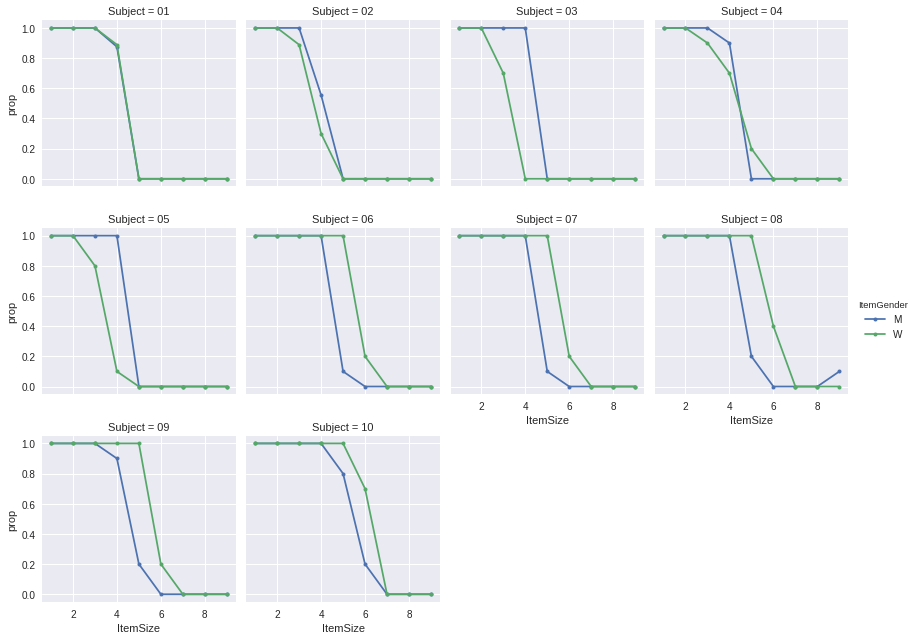

In [142]:
grid = sns.FacetGrid(df2, col="Subject", hue="ItemGender", col_wrap=4)
grid.map(plt.plot, "ItemSize", "prop", marker="o", ms=4)
grid.add_legend()

# Etape 4: fit des data pour trouver le PES

In [165]:
import statsmodels.api as sm
subjects = df2['Subject'].unique()
item_genders = df2['ItemGender'].unique()

all_fit = {}
for subject in subjects:
    for item_gender in item_genders:
        print(subject, item_gender)
        subdata = data[(data['Subject']==subject) & (data['ItemGender']==item_gender)].copy()
        subdata['mince'] = (subdata['Evaluation']=='mince').astype(int)
        subdata['gros'] = (subdata['Evaluation']=='gros').astype(int)
        binom = subdata[['gros', 'mince']]
        model = sm.GLM(binom, subdata['ItemSize'], family=sm.families.Binomial())
        model_result = model.fit()
        print(model_result.summary())
        all_fit[(subject, item_gender)] = model_result



01 M
                 Generalized Linear Model Regression Results                  
Dep. Variable:      ['gros', 'mince']   No. Observations:                   83
Model:                            GLM   Df Residuals:                       82
Model Family:                Binomial   Df Model:                            0
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -43.371
Date:                Tue, 18 Apr 2017   Deviance:                       86.742
Time:                        17:54:36   Pearson chi2:                     71.5
No. Iterations:                     4                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ItemSize       0.2391      0.053      4.536      0.000       0.136       0.342
01 W
                 Generalized Linear Model 

                 Generalized Linear Model Regression Results                  
Dep. Variable:      ['gros', 'mince']   No. Observations:                   89
Model:                            GLM   Df Residuals:                       88
Model Family:                Binomial   Df Model:                            0
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -59.120
Date:                Tue, 18 Apr 2017   Deviance:                       118.24
Time:                        17:54:36   Pearson chi2:                     88.0
No. Iterations:                     4                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ItemSize       0.0879      0.040      2.211      0.027       0.010       0.166
07 M
                 Generalized Linear Model Regre

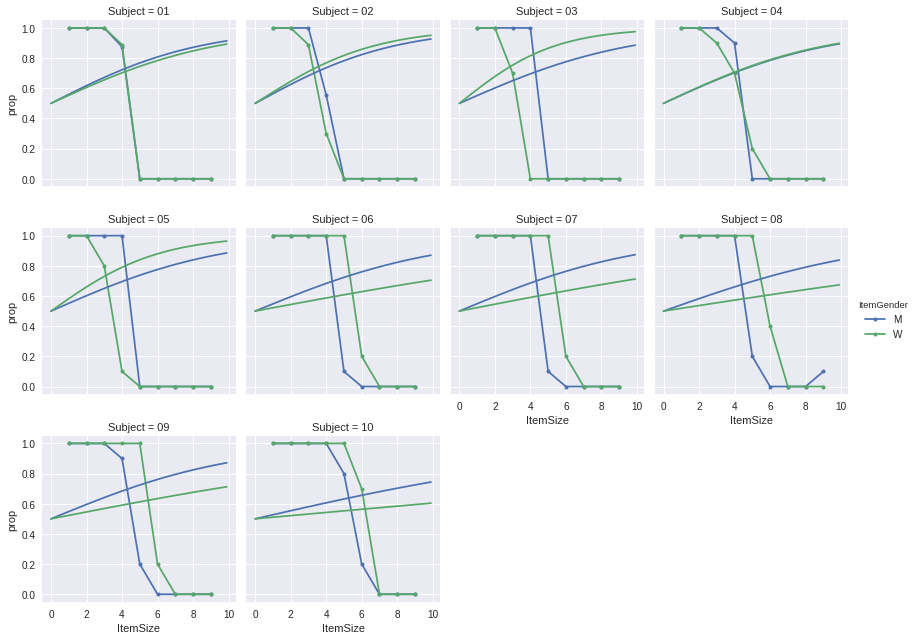

In [166]:
# On affiche dans le meme graph que précédement
grid = sns.FacetGrid(df2, col="Subject", hue="ItemGender", col_wrap=4)
grid.map(plt.plot, "ItemSize", "prop", marker="o", ms=4)
grid.add_legend()

x = np.arange(0,10,0.1)

for i, subject in enumerate(subjects):
    ax = grid.axes.flatten()[i]
    for item_gender in item_genders:
        model = all_fit[(subject, item_gender)]
        y = model.predict(x)
        ax.plot(x, y)



In [133]:
# on trouve la PES pour chaque subjet/ItemGender
# valeur de Item size quand prop est proche de 0.5

index = pd.MultiIndex.from_product([subjects, item_genders], names=['Suject', 'ItemGender'])
all_pes = pd.DataFrame(index=index, columns=['pes'])

x = np.arange(0,10,0.01)
for subject in subjects:
    for item_gender in item_genders:
        model = all_fit[(subject, item_gender)]
        y = model.predict(x)
        ind = np.argmin(np.abs(y-.5))
        all_pes.loc[(subject, item_gender), 'pes'] = x[ind]

all_pes = all_pes.unstack('ItemGender')
all_pes


pes   
ItemGender   M  W
Suject           
01           0  0
02           0  0
03           0  0
04           0  0
05           0  0
06           0  0
07           0  0
08           0  0
09           0  0
10           0  0